Homework 0
==========

Sergei Mikhailovich Prokudin-Gorskii was a color photographer far ahead of his time. He undertook a photographic survey of the Russian Empire for Tsar Nicholas II and was able to capture color pictures before color cameras were invented. His idea was to simply take three pictures of each scene, each with a red, green and blue color filter which could then be used to obtain a color image. There was no way of printing these back in the day, so he envisioned complex display devices to show these. However these were never made, but his pictures survived. In this homework, you will write a program to combine individual photos into a gray-scale photo.

Visualizing the Data
--------------------
You have been given the red, green, and blue channels of an image that were taken separately using this technique. These files are named red.npy, green.npy, and blue.npy respectively. Let's load these images, and visualize them.

# Load libraries and convenience functions

from IPython import display
import matplotlib.pyplot as plt
import numpy as np

def load_image(filename):
    img = np.load(filename)
    img = img.astype("float32") / 255.
    return img

def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

def show_image(img):
    plt.imshow(img, interpolation='nearest')

In [3]:
# Load libraries and convenience functions

from IPython import display
import matplotlib.pyplot as plt
import numpy as np

def load_image(filename):
    img = np.load(filename)
    img = img.astype("float32") / 255.
    return img

def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

def show_image(img):
    plt.imshow(img, interpolation='nearest')

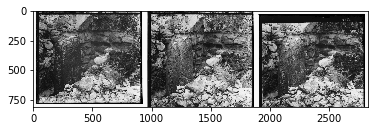

In [4]:
images = [load_image('red.npy'),
          load_image('green.npy'),
          load_image('blue.npy')]

show_image(gray2rgb(np.concatenate(images, axis=1)))

The Problem
-----------
Because these images were taken separately, just combining them in a 3-channel matrix may not work. The code below shows what happens if you simply combine the images without shifting any of the channels. Run the code to visualize what happens if you just combine them without correctly aligning them.

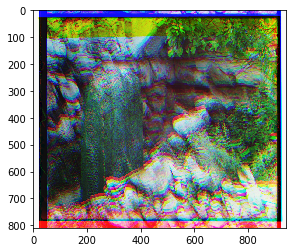

In [5]:
show_image(np.stack(images, axis=-1))

Your Task
---------

Your job is to write a function that takes these three images, and correctly aligns them. Since you have to process many of these images, you do not want to manually align them. Instead, your task is to write a program that automatically finds the alignment, then combines them together to produce the final image.

The easiest way to do this is to find the alignment between two pairs of channels at a time. For example, you can figure out how to align the red channel with the green channel, and the red channel with the blue channel. Then, you can combine them together.

We have given you code to get you started. You should fill in three areas:

1. **score_function(im1, im2)** should take in two images, and return a floating point score to indicate how well the two images are aligned. The lower the score, the better they are aligned. There are many scoring functions you can experiment with. The simplest is Euclidean distance betwen the two images.

2. **align_channels(chan1, chan2)** should take in two images, and return a tuple (dy, dx) indicating how to shift one image into the other. This funnction should call **score_function()** to perform this task. For simplicity, you can assume that the shift is at most -30 pixels to 30 pixels. 

3. **combine_images()** should use the found alignments to correctly combine the images into a color image.

Submission
----------

You should export your completed notebook as a PDF and upload to Courseworks. The completed notebook should show your code, as well as the final combined image you created. 

In [6]:
# Store the height and width of the images
height, width = images[0].shape

# Pad each image with black by 30 pixels. You do not need to use this, but
# padding may make your implementation easier.
pad_size = 30
images_pad = [np.pad(x, pad_size, mode='constant') for x in images]

# Given two matrices, write a function that returns a number of how well they are aligned.
# The lower the number, the better they are aligned. There are a variety of scoring functions
# you can use. The simplest one is the Euclidean distance between the two matrices. 
def score_function(im1, im2):
    # TODO
    score = np.sqrt(np.sum(np.square(im1-im2)))
    pass
    return score

# Given two matrices chan1 and chan2, return a tuple of how to shift chan2 into chan1. This
# function should search over many different shifts, and find the best shift that minimizes
# the scoring function defined above. 
def align_channels(chan1, chan2):
    best_offset = (0,0)
    best_score = score_function(chan1,chan2)
    # choose chan1 as the base image
    # TODO
    x_offest = 0
    y_offest = 0
    x_max , y_max = chan1.shape
    length_x , length_y = images[0].shape
    while x_offest <=pad_size*2:
        while y_offest <= pad_size*2:
            temp_chan2 = chan2[pad_size:pad_size+length_x,pad_size:pad_size+length_y]
            temp_chan1 = chan1[x_offest:x_offest+length_x,y_offest:y_offest+length_y]
            temp_score = score_function(temp_chan1,temp_chan2)
            if temp_score < best_score:
                best_score = temp_score
                best_offset = (x_offest-pad_size,y_offest-pad_size)
            y_offest += 1
        x_offest += 1
    return best_offset

rg_dx, rg_dy = align_channels(images_pad[0], images_pad[1])
rb_dx, rb_dy = align_channels(images_pad[0], images_pad[2])

In [7]:
# Use the best alignments to now combine the three images. You should use any of the variables
# above to return a tensor that is (Height)x(Width)x3, which is a color image that you can visualize.
def combine_images():
    #TODO
    #length_x , length_y = images[0].shape
    final_g = images_pad[0].copy()
    final_g[:,:] = 0.
    final_g[rg_dx+pad_size:rg_dx+pad_size+height,rg_dy+pad_size:rg_dy+pad_size+width] = images[1]
    
    
    final_b = images_pad[0].copy()
    final_b[:,:] = 0.
    final_b[rb_dx+pad_size:rb_dx+pad_size+height,rb_dy+pad_size:rb_dy+pad_size+width] = images[2]
    #crop the padding
    final_image = [
        images[0],
        final_g[pad_size:pad_size+height,pad_size:pad_size+width],
        final_b[pad_size:pad_size+height,pad_size:pad_size+width]
    ]
    return np.stack(final_image,axis=-1)

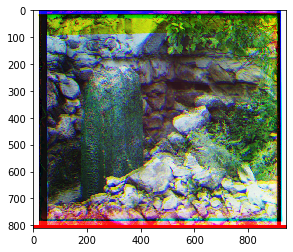

In [8]:
final_image = combine_images()
if final_image is not None:
    show_image(final_image)